# MADE-2021 HPC

## Домашнее задание №1

Студент: Черников Дмитрий MADE_ML-32

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
# Scrapper forked from
# https://github.com/codificat/top500
# with minor kludge fixes

!git clone https://github.com/cherninkiy/top500.git

Cloning into 'top500'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 217 (delta 0), reused 2 (delta 0), pack-reused 212
Receiving objects: 100% (217/217), 2.77 MiB | 2.12 MiB/s, done.
Resolving deltas: 100% (105/105), done.


## Задание 1

На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

### Ответ получился порядка 10 EFlop/s ~ 10^19 Flop/s

In [7]:
#!python ./top500/scrape.py --year 1993 --month 6  --count 100 top100hpc.csv >./top100hpc.log
!head -n 5 ./top100hpc.log

* Scraping TOP500 list edition: 1993/6
** Page 1 of 1
-- Downloading: https://www.top500.org/lists/top500/list/1993/06/?page=1
-- Downloading: https://www.top500.org/system/166997
-- Downloading: https://www.top500.org/system/167059


In [8]:
df = pd.read_csv('top100hpc.csv')
df.head(3)

,site_name,system_url,manufacturer,cores,memory,processor,interconnect,rmax,rpeak,nmax,...,country,site_id,system_id,name,site_url,city,segment,year,month,rank
0,Los Alamos National Laboratory,http://www.acl.lanl.gov/,Thinking Machines CorporationLos Alamos Nation...,1024,NaN,SuperSPARC I 32MHz,"Hypercube, tree",59.7,131.0,52224.0,...,NaN,NaN,166997,CM-5/1024,NaN,NaN,NaN,1993,6,1
1,Minnesota Supercomputer Center,NaN,Thinking Machines CorporationMinnesota Superco...,544,NaN,SuperSPARC I 32MHz,"Hypercube, tree",30.4,69.6,36864.0,...,NaN,NaN,167059,CM-5/544,NaN,NaN,NaN,1993,6,2
2,NCSA,NaN,Thinking Machines CorporationNCSAUnited States,512,NaN,SuperSPARC I 32MHz,"Hypercube, tree",30.4,65.5,36864.0,...,NaN,NaN,167057,CM-5/512,NaN,NaN,NaN,1993,6,3


In [9]:
df_top = df[df['rank'] == 1] \
    .reset_index(drop=True) \
    .dropna(axis=1, how='all') \
    .drop(columns=['rank', 'site_name', 'system_id', 'system_url'])

df_top.loc[:22,'rmax'] = df_top.loc[:22,'rmax'] / 1000
df_top.loc[:22,'rpeak'] = df_top.loc[:22,'rpeak'] / 1000
df_top.head(3)

,manufacturer,cores,memory,processor,interconnect,rmax,rpeak,nmax,nhalf,hpcg,power,os,compiler,math,mpi,gpu,name,year,month
0,Thinking Machines CorporationLos Alamos Nation...,1024,NaN,SuperSPARC I 32MHz,"Hypercube, tree",0.0597,0.1310,52224.0,24064.0,NaN,NaN,CMOST,NaN,NaN,NaN,NaN,CM-5/1024,1993,6
1,FujitsuNational Aerospace Laboratory of JapanJ...,140,NaN,Fujitsu 105MHz,Full distributed crossbar,0.1240,0.2358,NaN,NaN,NaN,NaN,UXP/V,NaN,NaN,NaN,NaN,Numerical Wind Tunnel,1993,11
2,IntelSandia National LaboratoriesUnited States,3680,NaN,Intel 80860 50MHz,2-D mesh (torus),0.1434,0.1840,55700.0,20500.0,NaN,NaN,OSF/1,NaN,NaN,NaN,NaN,XP/S140,1994,6


In [10]:
df_top.tail(3)

,manufacturer,cores,memory,processor,interconnect,rmax,rpeak,nmax,nhalf,hpcg,power,os,compiler,math,mpi,gpu,name,year,month
53,FujitsuRIKEN Center for Computational ScienceJ...,7299072,5087232.0,A64FX 48C 2.2GHz,Tofu interconnect D,415530.0,513854.7,21288960.0,NaN,16004.5,28335.0,Red Hat Enterprise Linux,FUJITSU Software Technical Computing Suite V4.0,FUJITSU Software Technical Computing Suite V4.0,FUJITSU Software Technical Computing Suite V4.0,NaN,Supercomputer Fugaku- Supercomputer Fugaku,2020,6
54,FujitsuRIKEN Center for Computational ScienceJ...,7630848,5087232.0,A64FX 48C 2.2GHz,Tofu interconnect D,442010.0,537212.0,21288960.0,NaN,16004.5,29899.0,Red Hat Enterprise Linux,FUJITSU Software Technical Computing Suite V4.0,FUJITSU Software Technical Computing Suite V4.0,FUJITSU Software Technical Computing Suite V4.0,NaN,Supercomputer Fugaku- Supercomputer Fugaku,2020,11
55,FujitsuRIKEN Center for Computational ScienceJ...,7630848,5087232.0,A64FX 48C 2.2GHz,Tofu interconnect D,442010.0,537212.0,21288960.0,NaN,16004.5,29899.0,Red Hat Enterprise Linux,FUJITSU Software Technical Computing Suite V4.0,FUJITSU Software Technical Computing Suite V4.0,FUJITSU Software Technical Computing Suite V4.0,NaN,Supercomputer Fugaku- Supercomputer Fugaku,2021,6


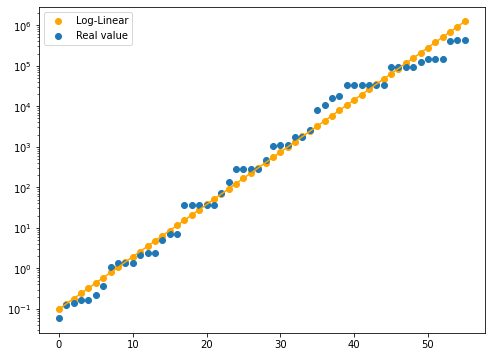

In [11]:
z = np.polyfit(df_top.index, np.log(df_top['rmax']), 1)
rll = np.exp(df_top.index * z[0] + z[1])

fig = plt.figure(figsize=(8,6))
ax = fig.subplots()

ax.plot(df_top.index, rll, color='orange')
ax.scatter(df_top.index, rll, color='orange', label='Log-Linear')

ax.scatter(df_top.index, df_top['rmax'], label='Real value')
ax.set_yscale('log')
ax.legend()
plt.show()


Считаем, что производительность самого быстрого компьютера исторически росла по лог-линейному закону.

Для предстказания производительности в 2025 году сэмплим из стандартного нормального распределения.

'Sampled rmax values:'

array([12789352.36839991, 12902900.73292493, 12346786.76348104,
       13716458.92981038, 12306927.0645572 , 12649045.03778186,
       12014766.74289204, 11382670.92731328, 13478294.02788201,
       11687343.5438798 ])

'Predicted performance: 12527454.613892246 Tflop/s'

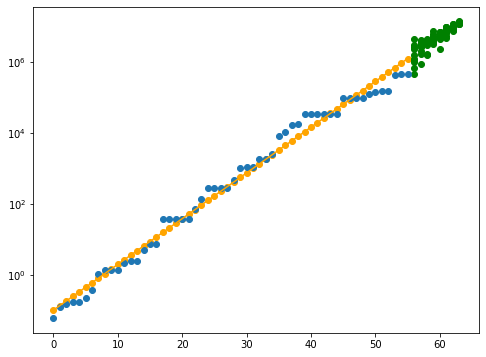

In [27]:
# Feauture top500 lists:
future_lists = [
    '2021/11',
    '2022/06', '2022/11',
    '2023/06', '2023/11',
    '2024/06', '2024/11',
    '2025/06',
]

temperature = 10
n = len(df_top.index)
idx = np.arange(n, n + len(future_lists))

# standard deviation
delta = rll - df_top['rmax']
sigma = np.std(delta) * temperature

# expected values
mu = np.exp(idx * z[0] + z[1])
#mu -= list(delta)[-1]

# sampled values
m = 10
sx = []
sy = []
for i, r in enumerate(mu):
    sx.extend([n + i]*m)
    sy.extend(np.random.normal(r, sigma, m))

preds = np.array(sy[-m:])

display('Sampled rmax values:')
display(preds)
display(f'Predicted performance: {np.mean(preds)} Tflop/s')

fig = plt.figure(figsize=(8,6))
ax = fig.subplots()

ax.plot(df_top.index, rll, color='orange')
ax.scatter(df_top.index, rll, color='orange')
ax.scatter(sx, sy, color='green')

ax.scatter(df_top.index, df_top['rmax'])
ax.set_yscale('log')

plt.show()

## Задание 2

Оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

Данные о произведенной эдектроэнергии отсюда https://en.wikipedia.org/wiki/List_of_countries_by_electricity_production

### Ответ получился порядка 2.4e-06%, что очень мало

In [13]:
# https://en.wikipedia.org/wiki/List_of_countries_by_electricity_production
# World produces 26823200 GWh power

PRODUCED_POWER = 26823200 * (10**6)
f'Produced power: {PRODUCED_POWER} kWh'

'Produced power: 26823200000000 kWh'

In [14]:
#!python ./top500/scrape.py --year 2021 --month 6  top500hpc.csv >./top500hpc.log
!head -n 5 ./top500hpc.log

* Scraping TOP500 list edition: 2021/6
** Page 1 of 5
-- Downloading: https://www.top500.org/lists/top500/list/2021/06/?page=1
-- Downloading: https://www.top500.org/system/179807
Igoring unkown detail 'Power Measurement Level:' in system 179807


In [15]:
df = pd.read_csv('top500hpc.csv')
df.head(3)

,site_name,system_url,manufacturer,cores,memory,processor,interconnect,rmax,rpeak,nmax,...,country,site_id,system_id,name,site_url,city,segment,year,month,rank
0,RIKEN Center for Computational Science,https://www.r-ccs.riken.jp/en/fugaku/project,FujitsuRIKEN Center for Computational ScienceJ...,7630848,5087232.0,A64FX 48C 2.2GHz,Tofu interconnect D,442010.0,537212.0,21288960.0,...,NaN,NaN,179807,Supercomputer Fugaku- Supercomputer Fugaku,NaN,NaN,NaN,2021,6,1
1,DOE/SC/Oak Ridge National Laboratory,http://www.olcf.ornl.gov/olcf-resources/comput...,IBMDOE/SC/Oak Ridge National LaboratoryUnited ...,2414592,2801664.0,IBM POWER9 22C 3.07GHz,Dual-rail Mellanox EDR Infiniband,148600.0,200794.9,16473600.0,...,NaN,NaN,179397,Summit- IBM Power System AC922,NaN,NaN,NaN,2021,6,2
2,DOE/NNSA/LLNL,https://hpc.llnl.gov/hardware/platforms/sierra,IBM / NVIDIA / MellanoxDOE/NNSA/LLNLUnited States,1572480,1382400.0,IBM POWER9 22C 3.1GHz,Dual-rail Mellanox EDR Infiniband,94640.0,125712.0,11902464.0,...,NaN,NaN,179398,Sierra- IBM Power System AC922,NaN,NaN,NaN,2021,6,3


count      181.000000
mean      1900.574586
std       3559.653048
min         61.000000
25%        559.000000
50%        943.000000
75%       1470.000000
max      29899.000000
Name: power, dtype: float64

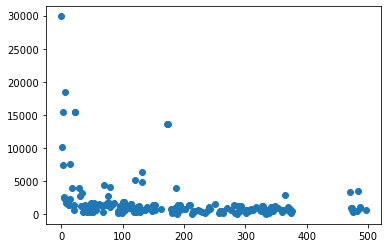

In [16]:
df_pow = df['power']

display(df_pow.describe())
plt.scatter(df_pow.index, df_pow)
plt.show()

Заполним пропуски в данных мединанным значением и посчитаем сумму общей потребляемой мощности

In [17]:
df_pow.median()

943.0

count      500.00000
mean      1289.64200
std       2186.99509
min         61.00000
25%        943.00000
50%        943.00000
75%        943.00000
max      29899.00000
Name: power, dtype: float64

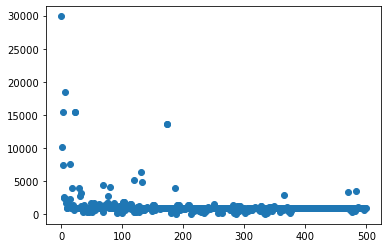

In [18]:
df_pow = df_pow.fillna(df_pow.median())

display(df_pow.describe())
plt.scatter(df_pow.index, df_pow)

plt.show()

In [19]:
display(f'HPC total power {df_pow.sum()} kWh')

display(f'HPC uses {df_pow.sum() / PRODUCED_POWER * 100:0.2}% world produced power')


'HPC total power 644821.0 kWh'

'HPC uses 2.4e-06% world produced power'